# 2.1 - Regresion-Clasificacion

### Regresión  (se busca un nº)

### Regresión lineal

Se han de tener algunas suposiciones previas:

+ Exogeneidad débil (predictores libres de error)
+ Linealidad
+ Homocedasticidad (Var=cte) y Esperanza nula (**E**=0), la esperanza es la media (Se suponen valores normalziados)
+ Independencia de los errores. En la formula hay un solo error, pero existe un error por cada variable.
+ Falta de colinealidad (independencia lineal). ML supone que toda causalidad es colinealdiad(correlación).

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n+\epsilon$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente:

$$\vec{\beta} = (X^{T}X)^{-1}X^{T}y$$

Esta opcion es muy compleja computacionalmente el calculo de la matriz inversa, por lo que se recurre a 

+ Minimos cuadrados

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y-\hat{y})^{2}$$

Ejemplo)

$y = \beta_0 + \beta_1x_1 + \epsilon$

Entonces, derivando MSE e igualando a 0:

$\beta_0 = \frac{\sum y - \beta_1\sum x}{n} = \bar{y} - \beta_1\bar{x}$

$\beta_1=\frac{\sum (x-\hat{x})(y-\hat{y})}{\sum (x-\hat{x})}$

Entrenar un modelo es minimizar la derivada de MSE e igualando a cero.(.fit)

Se busca la convergencia. No todos los modelos convergen. Los algoritmos genenricos siempre convergencen, las redes naturales necesitan muchos datos.

Teorema de Cauchy. problema de control inicial
Porblema del contorno

ML asume que depende del pasado. Si no hay eventos raros es cierto. Mejor asumcion es cadena de Markov, el presente depende de ayer, no del pasado.


In [12]:
import pylab as plt
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


In [13]:
boston = load_boston()

In [16]:
df= pd.DataFrame(boston.data, columns = boston.feature_names)

In [18]:
df['price']= boston.target

In [19]:
X =df.drop('price', axis=1)
y = df.price

In [24]:
len(X)

506

In [39]:
X_train, X_test,y_train, y_test = tts(X,y,test_size=.2, random_state =42)


In [34]:
linreg = LinReg()
linreg.fit(X_train, y_train)


LinearRegression()

In [37]:
train_score=linreg.score(X_train, y_train)
test_score = linreg.score(X_test,y_test)

train_score, test_score

(0.7326045070648635, 0.7752281271471609)

Overfitting and Underfittig can be detected comparing train_score y test_score.
Overfitting: Train >> test
Underfitting:Train << test
r2 >0.6 is acceptable.0.7 is a very good 

##### Regularización

**Función de Coste o de Pérdida (J)** = Función a minimizar

En el caso de la regresión lineal: 
$$J=MSE$$


La regularización es una medida/penalización de la complejidad del modelo. Se añade un término a J que depende del tipo de regularización:

$$J = MSE + \alpha · T$$


+ Lasso (L1, norma 1):

$$T=\frac{1}{n}\sum_{i}  |\beta_i|$$

Muy útil si se sospecha que hay características irrelevantes. Se favorece $\beta \approx 0$

+ Ridge (L2):

$$T=\frac{1}{2n}\sum_{i}  \beta_{i}^{2}$$

Muy útil si se sospecha que existe correlación entre las características, minimiza esa correlación. Funciona mejor si todas son relevantes.

+ ElasticNet (L1+L2):

$$T=r·L1 + (1-r)·L2$$

Se usa cuando hay muchas características.

In [28]:
lasso =Lasso()

In [40]:
lasso.fit(X_train, y_train)
train_score=lasso.score(X_train, y_train)
test_score = lasso.score(X_test,y_test)

train_score, test_score


(0.6959153721670908, 0.6671453631686304)

In [41]:
ridge=Ridge()

ridge.fit(X_train, y_train)
train_score=ridge.score(X_train, y_train)
test_score = ridge.score(X_test,y_test)

train_score, test_score

(0.7487825119234439, 0.6662221670168522)

In [42]:
elastic=ElasticNet()

elastic.fit(X_train, y_train)
train_score=elastic.score(X_train, y_train)
test_score = elastic.score(X_test,y_test)

train_score, test_score

(0.6908083499815865, 0.6731556429073877)

In [43]:
elastic.coef_

array([-0.09329918,  0.03557051, -0.02012984,  0.        , -0.        ,
        1.16299643,  0.01859135, -0.7554234 ,  0.27598038, -0.01427315,
       -0.7527046 ,  0.01101275, -0.77557569])

In [ ]:
Overfitting is overcome providing more data.

### Máquinas de Soporte Vectorial

###### Linealmente separable

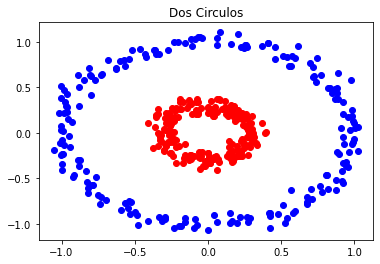

In [44]:
# Datos
X, y=make_circles(n_samples=400, factor=.3, noise=.05)


c_interno=y==1  # etiqueta circulo interno 
c_externo=y==0  # etiqueta circulo externo 


# plot de los circulos
plt.title('Dos Circulos')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   # 'ro' es mas o menos color rojo y marker 'o'
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
plt.show()

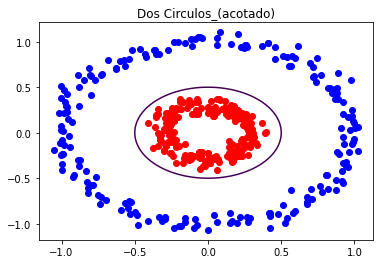

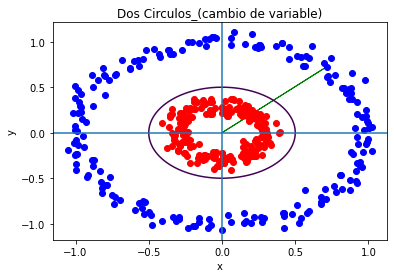

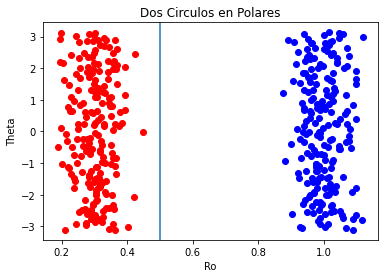

In [45]:
# plot de los circulos con el umbral 

plt.title('Dos Circulos_(acotado)')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
x=np.linspace(-1.0, 1.0, 100)  # para circunferencia umbral
y=np.linspace(-1.0, 1.0, 100)
z, t=np.meshgrid(x,y)
F=(z)**2+(t)**2-0.25
plt.contour(z,t,F,[0])
plt.show();


# Para polares
plt.title('Dos Circulos_(cambio de variable)')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
plt.axvline(x=0.0)  # sistema coordenadas
plt.axhline(y=0.0)
plt.arrow(0,0,0.72,0.73, color='g')  # vector
plt.contour(z,t,F,[0])    # circunferencia r=0.5
plt.xlabel('x')
plt.ylabel('y')

# En polares
X, y=make_circles(n_samples=400, factor=.3, noise=.05)


def polar_carte(ro, theta):  # definicion coordenadas polares, convierte polares en cartesianas
    x=ro*np.cos(theta)
    y=ro*np.sin(theta)
    return(x, y)

def carte_polar(x, y):       # convierte cartesianas en polares
    ro=np.sqrt(x**2+y**2)
    theta=np.arctan2(y, x)
    return(ro, theta)


# plot en polares
c_interno=y==1  # etiqueta circulo interno 
c_externo=y==0  # etiqueta circulo externo 
plt.figure(5)
plt.title('Dos Circulos en Polares')
plt.plot(carte_polar(X[c_interno, 0], X[c_interno, 1])[0],carte_polar(X[c_interno, 0], X[c_interno, 1])[1], 'ro')    # circulo interno
plt.plot(carte_polar(X[c_externo, 0], X[c_externo, 1])[0], carte_polar(X[c_externo, 0], X[c_externo, 1])[1], 'bo')   # circulo externo
plt.axvline(x=0.5)          # umbral, recta vertical en x=0.5
plt.xlabel('Ro')
plt.ylabel('Theta')
plt.show();

**Kernel Trick**

Se utiliza una tercera dimension para separar los circulos: se utiliza un plano

Se puede utilizar como regresor y como clasificador

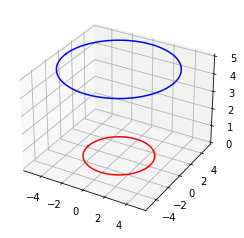

In [46]:
ang=np.linspace(-np.pi, np.pi, 200)


x=3*np.cos(ang)
y=3*np.sin(ang)
z=0  # en realidad, la coordenada z=x^2+y^2


x_1=5*np.cos(ang)
y_1=5*np.sin(ang)
z_1=5


fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot(x, y, z, color='r')
ax.plot(x_1, y_1, z_1, color='b')
plt.show();

###### SVM

![svm](images/svm.png)

Genera un hiperplano (n-1)dimensional para separar los datos. Este primer plano es el llamado clasificador lineal (maximizando la distancia a los puntos).

$$\vec{\omega}\vec{x}-b=0$$

donde :

$\omega$ es el vector normal al plano
$x$ son los datos
$b$ es el sesgo

**Función a minimizar**

$$[\frac{1}{n}\sum_{i=1}^{n}max(0, 1-y_i(\vec{\omega}\vec{x}-b))] + \lambda \|\vec{\omega}\|$$

In [47]:
import warnings
warnings.simplefilter('ignore')

In [48]:
from sklearn.svm import SVR

In [49]:
svr=SVR()

In [55]:
svr=SVR(kernel ='poly')

svr.fit(X_train, y_train)
train_score=svr.score(X_train, y_train)
test_score = svr.score(X_test,y_test)

train_score, test_score

(0.188134609703971, 0.2705978929006456)

In [53]:
# help(SVR)

In [56]:
y_pred = svr.predict(X_test)

### Random Forest == Modelos de ensamblaje

https://towardsdatascience.com/decision-tree-algorithm-in-python-from-scratch-8c43f0e40173

![RF](images/RF.jpg)

Arboles de decisión.

+ Pros:

Modelos sencillos, se pueden visualizar. No necesitan preprocesar mucho los datos. Computacionalmente eficientes.

+ Contras:

Muy sensibles a pequeñas variaciones de los datos de entrada. Muy sensible a datos no balanceados. Muy dado al overfitting (poco sesgo, mucha varianza), más cuanto más profundo sea.

**Entropía de información**

$$H(x) = -\sum_i p_ilog(p_i)$$

$$H(x) = -\sum_i p_ilog(p_i) + (1-p_i)log(1-p_i)$$

**Bagging**

Bootstrap aggregating.

Muestreo aleatorio con reemplazamiento y de manera uniforme. Después se hace la media. Además RF coge para cada árbol un subconjunto de características de manera aleatoria (feature bagging), esto se hace para evitar la correlación entre árboles dentro del bosque.

**Extratrees**

Extremely randomized trees.

Tiene básicamente 2 diferencias:
+ Cada árbol usa todo el train (no bootstrap)
+ El spliteo hacia abajo es random (no minimizando entropia)

In [58]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [68]:
rfr=RFR(n_estimators = 90, max_depth =3)

rfr.fit(X_train, y_train)
train_score= rfr.score(X_train, y_train)
test_score = rfr.score(X_test,y_test)

train_score, test_score


(0.8728252859030886, 0.8311757468472072)

In [65]:
#help(RFR)

In [66]:
y_pred =rfr.predict(X_test)

In [70]:
y_pred[:10]

array([22.84888889, 30.78111111, 17.41666667, 23.16333333, 16.54666667,
       21.37888889, 19.17111111, 15.48777778, 21.21666667, 21.37666667])

In [78]:
from sklearn.tree import ExtraTreeRegressor as ETR
etr=ETR()




In [79]:
etr.fit(X_train, y_train)
train_score= etr.score(X_train, y_train)
test_score = etr.score(X_test,y_test)

train_score, test_score


(1.0, 0.4248644904505934)